In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Baks,Busse,and Green(2006)

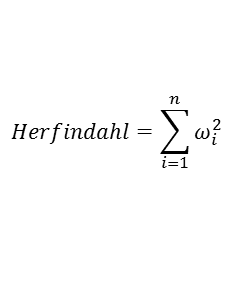
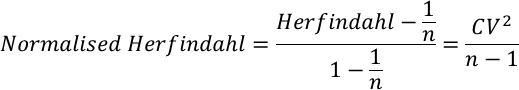
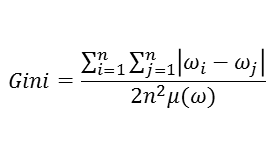
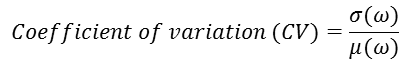
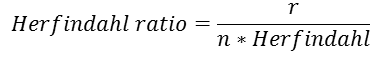

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\Technical analysis\\NEDL_Portfolio_Concentration.xlsx',index_col='Date')
df=df.rename(columns=df.iloc[0])
df=df[1:]
df=df.iloc[:,0:6]
df

,JPM,WMT,MSFT,KO,PFE,CAT
Date,,,,,,
2011-11-14,24.705299,46.650124,21.537199,24.791821,13.043631,72.89994
2011-11-15,24.819157,45.517323,21.683163,24.868612,13.096357,73.307755
2011-11-16,23.885593,44.899456,21.139864,24.506557,12.898625,72.310883
2011-11-17,23.141773,44.939053,20.710085,24.36393,12.832716,70.845764
2011-11-18,23.24044,45.335125,20.515478,24.645535,12.872263,70.936417
...,...,...,...,...,...,...
2021-11-08,169.059998,149.270004,336.98999,56.330002,48.330002,214.25
2021-11-09,167.779999,149.789993,335.950012,56.490002,47.299999,209.809998
2021-11-10,167.619995,148.440002,330.799988,56.720001,49.02,206.669998


In [3]:
Matrix=pd.DataFrame(columns=[df.columns],index=['Return','Weights'])
Matrix

,JPM,WMT,MSFT,KO,PFE,CAT
Return,NaN,NaN,NaN,NaN,NaN,NaN
Weights,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for i in df.columns:
    Matrix.loc['Return',i]=(df[i][-1]/df[i][0])**(1/10)-1
Matrix.loc['Weights']=[0.1885,0.1462,0.2394,0.1288,0.1562,0.1409]#1/6
Matrix

,JPM,WMT,MSFT,KO,PFE,CAT
Return,0.210476,0.1222,0.316461,0.086072,0.143199,0.111215
Weights,0.1885,0.1462,0.2394,0.1288,0.1562,0.1409


In [5]:
number_of_stocks=6
sum_of_Weights=Matrix.loc['Weights'].sum()
sum_of_Weights

1.0

In [6]:
portfolio_returns=Matrix.loc['Return'].values.dot(Matrix.loc['Weights'].values)
portfolio_returns

0.18242510729523007

In [7]:
Herfindahl_index=sum(Matrix.loc['Weights']**2)
Normalized_Herfindahl=round((Herfindahl_index-1/number_of_stocks)/(1-1/number_of_stocks),1)
Coefficient_of_variation=Matrix.loc['Weights'].std()/(1/number_of_stocks)
Herfindahl_ratio=portfolio_returns/(number_of_stocks*Herfindahl_index)
Herfindahl_index,Normalized_Herfindahl,Coefficient_of_variation,Herfindahl_ratio

(0.17505974, 0.0, 0.24582540145395881, 0.17367890840695305)

In [8]:
p_ret = []#Return list of our random portfolio
Herfindahl_ratio =[]#Herfindahl_ratios
p_sr1=[]
p_wt = []#weights

for x in range(600000):
    p_weights=np.random.random(len(df.columns))
    p_weights/=np.sum(p_weights)
    ret_1=Matrix.loc['Return'].values.dot(p_weights)
    p_ret.append(ret_1)
    Herfindahl_index=sum(p_weights**2)
    Herfindahl_ratio1=portfolio_returns/(number_of_stocks*Herfindahl_index)
    Herfindahl_ratio.append(Herfindahl_ratio1)
    p_wt.append(p_weights)
p_ret = np.array(p_ret)
Herfindahl_ratios = np.array(Herfindahl_ratio)
p_wt = np.array(p_wt)

p_ret,Herfindahl_ratios,p_wt

(array([0.17365239, 0.16618393, 0.13659756, ..., 0.17555421, 0.17939707,
        0.16647424]),
 array([0.14374651, 0.14522753, 0.141155  , ..., 0.1344571 , 0.16350705,
        0.14603172]),
 array([[0.02200068, 0.2136237 , 0.27496313, 0.20249401, 0.20519958,
         0.08171889],
        [0.04234299, 0.28105905, 0.240002  , 0.21514036, 0.11969355,
         0.10176204],
        [0.18346571, 0.21781659, 0.04884569, 0.25866751, 0.03930742,
         0.25189707],
        ...,
        [0.30584807, 0.29159617, 0.13681192, 0.07699416, 0.14484934,
         0.04390033],
        [0.21058146, 0.09094731, 0.23595784, 0.21214113, 0.09958105,
         0.15079121],
        [0.17196256, 0.00467182, 0.19026654, 0.2840105 , 0.1947298 ,
         0.15435877]]))

In [9]:
np.argmax(Herfindahl_ratios)

100235

In [10]:
p_wt[np.argmax(Herfindahl_ratios)]

array([0.16592785, 0.17176453, 0.1701855 , 0.16513601, 0.16010262,
       0.16688349])

In [11]:
p_ret[np.argmax(Herfindahl_ratios)]

0.16547062043748326

In [12]:
Herfindahl_ratios[np.argmax(Herfindahl_ratios)]

0.18233278170521916